c:\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


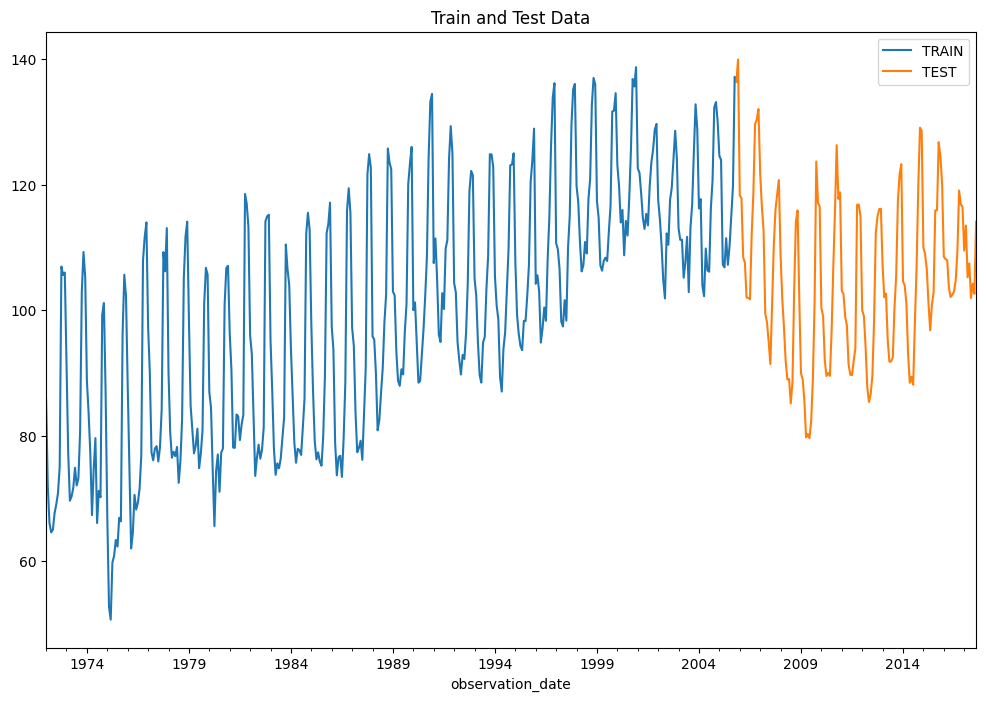

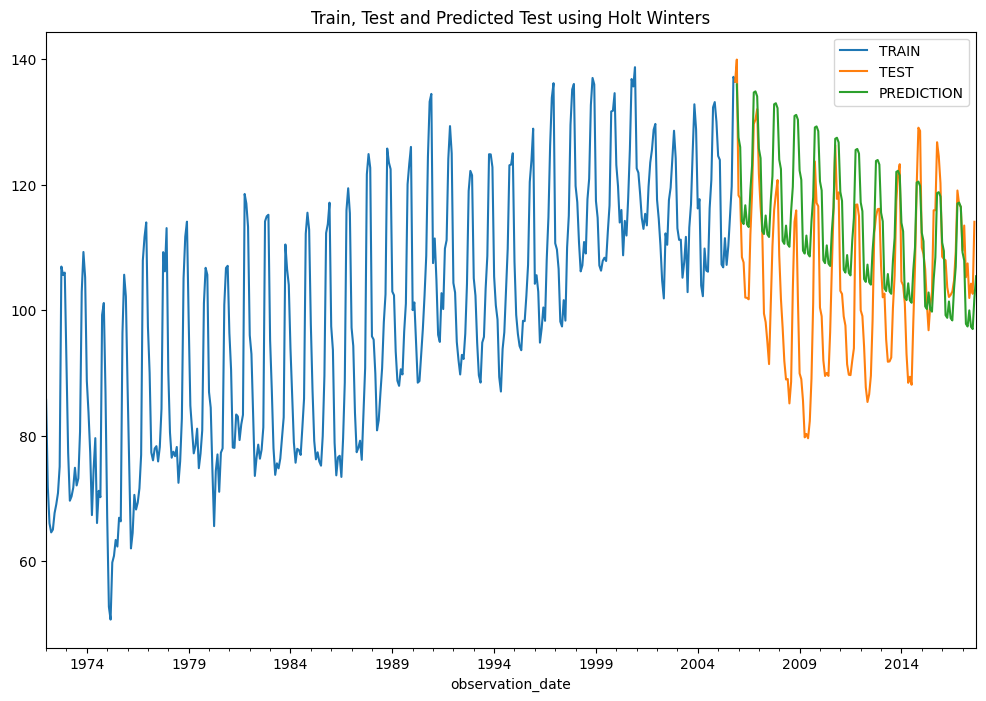

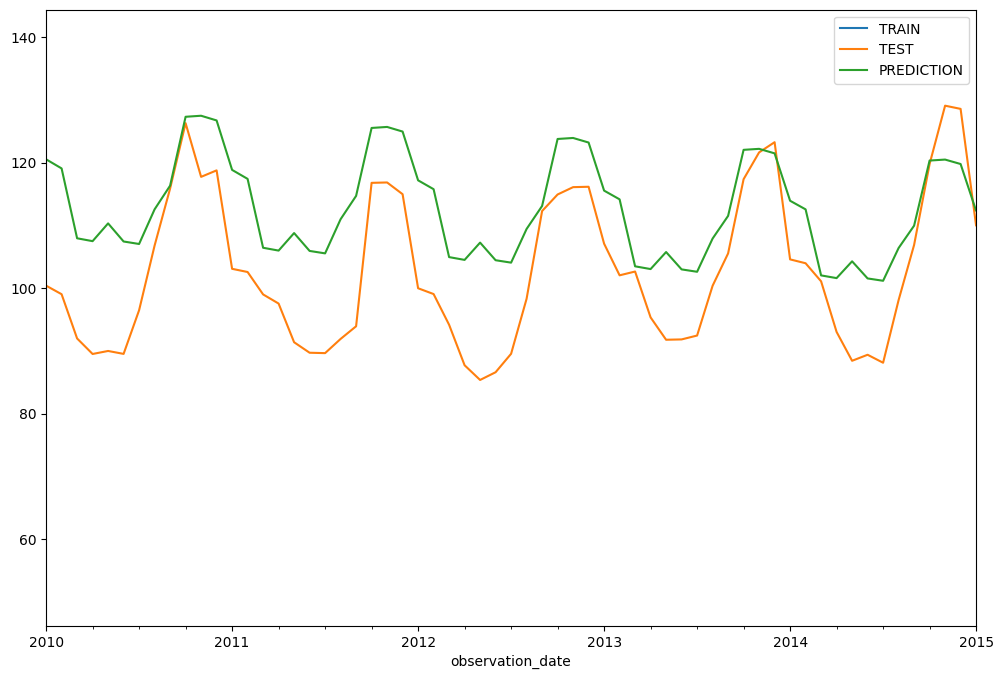

Mean Absolute Error = 11.465517094491528
Mean Squared Error = 200.7131616123185


c:\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


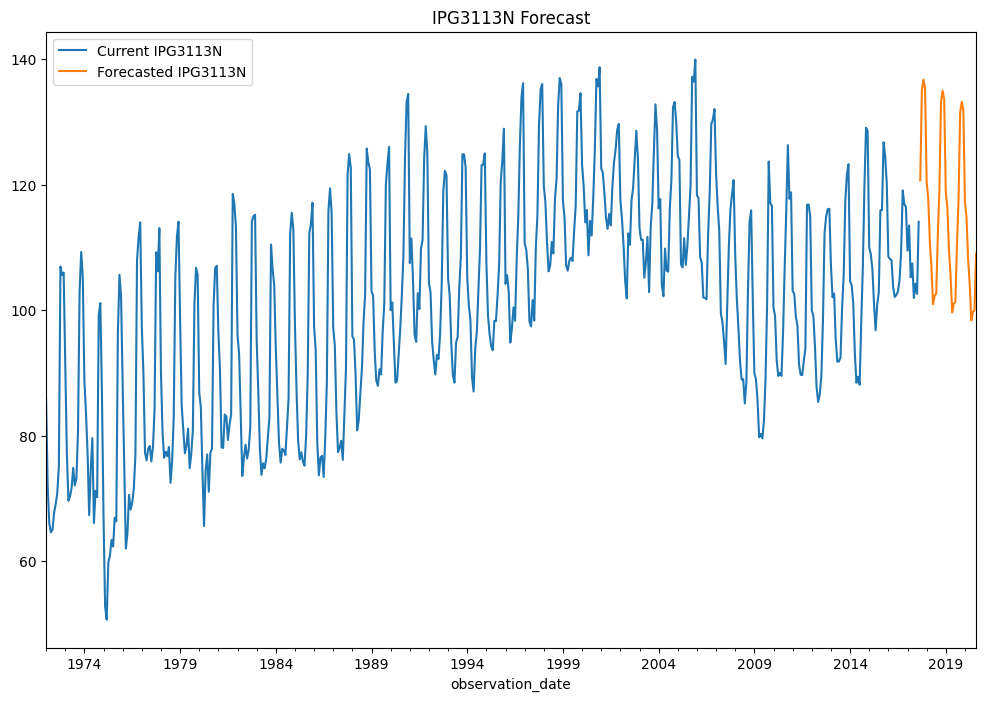

In [5]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error

from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv("candy_production.csv", index_col='observation_date', parse_dates=True)
df.index.freq = 'MS'

train = df[:407] 
test = df[406:]  

fitted_model = ExponentialSmoothing(train['IPG3113N'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(142).rename('HW Test Forecast')

train['IPG3113N'].plot(legend=True, label='TRAIN')
test['IPG3113N'].plot(legend=True, label='TEST', figsize=(12, 8))
plt.title('Train and Test Data')
plt.show()

train['IPG3113N'].plot(legend=True, label='TRAIN')
test['IPG3113N'].plot(legend=True, label='TEST', figsize=(12, 8))
test_predictions.plot(legend=True, label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()

train['IPG3113N'].plot(legend=True, label='TRAIN')
test['IPG3113N'].plot(legend=True, label='TEST', figsize=(12, 8))
test_predictions.plot(legend=True, label='PREDICTION', xlim=['2010-01-01', '2015-01-01'])
plt.show()

print(f'Mean Absolute Error = {mean_absolute_error(test, test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test, test_predictions)}')

final_model = ExponentialSmoothing(df['IPG3113N'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

forecast_predictions = final_model.forecast(steps=36)

df['IPG3113N'].plot(figsize=(12, 8), legend=True, label='Current IPG3113N')
forecast_predictions.plot(legend=True, label='Forecasted IPG3113N')
plt.title('IPG3113N Forecast')


plt.show()